<a href="https://colab.research.google.com/github/lizethblanco08/utadeo-aaut-talleres/blob/main/Taller_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Ejercicio**

Crear dos vectores de diez numeros aleatorios enteros [np.random.randint](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.randint.html) entre 1 y 10 y realizar las siguientes operaciones:
- sumarlos
- concatenar los dos arreglos
- encontrar la sumatoria de los valores
- encontrar la media de los valores
- imprimir los numeros mayores que 5
- determinar las posiciones de los numeros que son iguales en los arreglos



# Sección nueva

In [ ]:
a=np.random.randint(10, size=6)
b=np.random.randint(10, size=6)

print (a)
print (b)
c=np.concatenate((a,b), axis=0)
print(c)
print(c[c>5])

[4 6 7 1 5 1]
[9 1 0 0 2 8]
[4 6 7 1 5 1 9 1 0 0 2 8]
<built-in method mean of numpy.ndarray object at 0x7fa3f26ebda0>
[6 7 9 8]


Como notaste en el ejemplo anterior Pandas permite conectarse directamente a la base de datos, tambien permite leer datos en multiples formatos [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html) , por ejemplo si yo quiero cargar los datos originales de FASECOLDA



## Comprender los datos con visualización

Debes dedicar tiempo a comprender mejor tus datos. Una segunda forma de mejorar su comprensión de sus datos es mediante el uso de técnicas de visualización de datos . Usar la representación en Python para comprender los atributos por sí solos y sus interacciones. Ejemplos:
- Use la función hist () para crear un histograma de cada atributo.
- Use la función plot (kind = 'box') para crear diagramas de caja y cajas de cada atributo.
- Utilice la función  pandas.scatter_matrix() para crear gráficos de dispersión por pares de todos los atributos.

Es importante agregar```% inline matplotlib```  en la primera línea de su código si desea que la imagen esté incrustada en el *notebook* de Júpiter.


[pyplot](http://matplotlib.org/api/pyplot_api.html) es la mejor opción, claro que si trabajamos con Pandas, el tiene ya programada las graficas utlizando toda la información del dataset [ejemplo](https://pandas.pydata.org/pandas-docs/stable/10min.html#plotting)





### **Ejercicio** 

- Cargar el dataset de Fasecolda suministrado en csv

-  Comprenda sus datos usando la función `columns` para ver las filas
-  Utilize diferentes criterios para filtrar los datos.
-  utilize por lo menos tres funciones de pandas para describir los datos filtrados
-  Guarde los datos filtrados
-  Realize por lo menos tres graficas de los datos

[Link de descarga](https://drive.google.com/file/d/1mPnVLno8uLF1bD1EQbIRVUmxk1c1BVc4/view?usp=sharing)

1. Cargar set de datos 

In [35]:
# Cargar CSV using Pandas from URL
import pandas as pd
from IPython.display import display, HTML
filename = 'guia_fasecolda.csv'
data = pd.read_csv(filename, header=0, na_values=[""])

print(data.columns)


Index(['Novedad', 'Marca', 'Clase', 'Codigo', 'HomologoCodigo', 'Referencia1',
       'Referencia2', 'Referencia3', 'Peso', 'IdServicio', 'Servicio', '1970',
       '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979',
       '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', 'Bcpp', 'Importado', 'Potencia', 'TipoCaja',
       'Cilindraje', 'Nacionalidad', 'CapacidadPasajeros', 'CapacidadCarga',
       'Puertas', 'AireAcondicionado', 'Ejes', 'Estado', 'Combustible',
       'Transmision', 'Um', 'PesoCategoria'],
      dtype='object')


2. Validar nulidad de los datos

In [36]:
data.isnull().sum().sum()

14325

In [37]:
data.isnull().sum().sum

<bound method Series.sum of Novedad               0
Marca                 0
Clase                 0
Codigo                0
HomologoCodigo    12433
                  ...  
Estado                0
Combustible         726
Transmision         700
Um                    0
PesoCategoria         0
Length: 76, dtype: int64>

Al validar la nulidad del set de datos se identifican 14325 de los cuales 12433 corresponde a la variable "HomologoCodigo", 726 datos nulos en la variable "Combustible" y 700 en la variable "Transmisión". Por tanto se procede a eliminar estos datos nulos del set de datos.

In [38]:
print (data.columns)

Index(['Novedad', 'Marca', 'Clase', 'Codigo', 'HomologoCodigo', 'Referencia1',
       'Referencia2', 'Referencia3', 'Peso', 'IdServicio', 'Servicio', '1970',
       '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979',
       '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', 'Bcpp', 'Importado', 'Potencia', 'TipoCaja',
       'Cilindraje', 'Nacionalidad', 'CapacidadPasajeros', 'CapacidadCarga',
       'Puertas', 'AireAcondicionado', 'Ejes', 'Estado', 'Combustible',
       'Transmision', 'Um', 'PesoCategoria'],
      dtype='object')


In [39]:
#Se elimina la columna "HomologoCodigo"
data1=data[['Novedad', 'Marca', 'Clase', 'Codigo', 'Referencia1',
       'Referencia2', 'Referencia3', 'Peso', 'IdServicio', 'Servicio', '1970',
       '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979',
       '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', 'Bcpp', 'Importado', 'Potencia', 'TipoCaja',
       'Cilindraje', 'Nacionalidad', 'CapacidadPasajeros', 'CapacidadCarga',
       'Puertas', 'AireAcondicionado', 'Ejes', 'Estado', 'Combustible',
       'Transmision', 'Um', 'PesoCategoria']]

In [40]:
#Eliminar datos nulos
data1=data1.dropna(axis=0)

In [41]:
data1.isnull().sum()

Novedad          0
Marca            0
Clase            0
Codigo           0
Referencia1      0
                ..
Estado           0
Combustible      0
Transmision      0
Um               0
PesoCategoria    0
Length: 75, dtype: int64

In [42]:
#Realiza diferentes filtros sobre los datos y describelos
bd1 = data1[data1.Clase.isin(['AUTOMOVIL', 'MOTOCICLETA', 'CAMPERO'])& data1.Marca.isin(['KIA','CHEVROLET'])]
bd1.head()

,Novedad,Marca,Clase,Codigo,Referencia1,Referencia2,Referencia3,Peso,IdServicio,Servicio,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Bcpp,Importado,Potencia,TipoCaja,Cilindraje,Nacionalidad,CapacidadPasajeros,CapacidadCarga,Puertas,AireAcondicionado,Ejes,Estado,Combustible,Transmision,Um,PesoCategoria
850,M,CHEVROLET,AUTOMOVIL,1601001,CAMARO [4],Z28,MT 5700CC COUPE,1553,1,Particular,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14400,15400,16500,17700,19000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,71100,88900,1,275,MT,5800,USA,4,0,2,1,2,Activo,GSL,4X2,0,2
851,M,CHEVROLET,AUTOMOVIL,1601005,CAPRICE [3],CLASSIC,AT 5000CC SW,0,1,Particular,0,0,0,0,0,0,0,0,0,0,2000,0,0,0,0,0,0,0,0,0,3800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35400,44300,1,140,AT,5000,USA,5,0,5,0,2,Activo,GSL,4X2,0,1
852,M,CHEVROLET,AUTOMOVIL,1601006,CELEBRITY,2.0,AT 2000CC AA,1050,1,Particular,0,0,0,0,0,0,0,0,0,0,0,0,1800,1900,2000,2100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17500,21900,1,80,AT,2000,USA,0,0,4,1,2,Activo,GSL,4X2,0,1
853,M,CHEVROLET,AUTOMOVIL,1601007,CELEBRITY,LUJO,AT 2800CC V6,0,1,Particular,0,0,0,0,0,0,0,0,0,0,0,0,0,2300,2500,2700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20600,25800,1,0,AT,2800,USA,0,0,4,0,2,Activo,GSL,4X2,0,1
854,M,CHEVROLET,AUTOMOVIL,1601010,CHEVETTE,1.4,MT 1400CC IMP,0,1,Particular,0,0,0,0,0,0,0,0,0,0,800,900,1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16500,19000,0,0,MT,1400,COL,5,0,4,0,2,Activo,GSL,4X2,0,1


In [44]:
#base de datos no.2
bd2 = data1[data.Clase.isin(['AUTOMOVIL']) & data1.Nacionalidad.isin(['COL'])]
bd2.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Novedad,Marca,Clase,Codigo,Referencia1,Referencia2,Referencia3,Peso,IdServicio,Servicio,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Bcpp,Importado,Potencia,TipoCaja,Cilindraje,Nacionalidad,CapacidadPasajeros,CapacidadCarga,Puertas,AireAcondicionado,Ejes,Estado,Combustible,Transmision,Um,PesoCategoria
854,M,CHEVROLET,AUTOMOVIL,1601010,CHEVETTE,1.4,MT 1400CC IMP,0,1,Particular,0,0,0,0,0,0,0,0,0,0,800,900,1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16500,19000,0,0,MT,1400,COL,5,0,4,0,2,Activo,GSL,4X2,0,1
855,A,CHEVROLET,AUTOMOVIL,1601011,CHEVETTE,COUPE,MT 1400CC 3P,0,1,Particular,0,0,0,0,0,0,0,0,0,0,0,0,800,900,1000,1100,1200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15500,17800,0,0,MT,1400,COL,5,0,3,0,2,Activo,GSL,4X2,0,1
856,M,CHEVROLET,AUTOMOVIL,1601012,CHEVETTE,SD,MT 1400CC 4P,1350,1,Particular,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1300,1400,1500,1600,1700,1800,1900,2000,2100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20400,23500,0,73,MT,1400,COL,5,0,4,0,2,Activo,GSL,4X2,0,1
857,A,CHEVROLET,AUTOMOVIL,1601013,CHEVETTE,1.4,MT 1400CC TAXI,1350,2,Publico,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,40,50,60,70,80,100,120,140,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11600,13300,0,76,MT,1400,COL,5,0,4,0,2,Activo,GSL,4X2,0,1
859,M,CHEVROLET,AUTOMOVIL,1601024,MONZA,DL,MT 1800CC STD,1090,1,Particular,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2100,2300,2500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26500,30500,0,83,MT,1796,COL,5,0,4,0,2,Activo,GSL,4X2,0,1


In [45]:
#Realiza diferentes filtros sobre los datos y describelos
bd3 = data1[data1.Clase.isin(['AUTOMOVIL'])& data1.Marca.isin(['CHEVROLET']) & data1.Nacionalidad.isin(['COL']) & data1.TipoCaja.isin(['MT']) & data1.CapacidadPasajeros.isin(['5']) ]
bd3.head()

,Novedad,Marca,Clase,Codigo,Referencia1,Referencia2,Referencia3,Peso,IdServicio,Servicio,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Bcpp,Importado,Potencia,TipoCaja,Cilindraje,Nacionalidad,CapacidadPasajeros,CapacidadCarga,Puertas,AireAcondicionado,Ejes,Estado,Combustible,Transmision,Um,PesoCategoria
854,M,CHEVROLET,AUTOMOVIL,1601010,CHEVETTE,1.4,MT 1400CC IMP,0,1,Particular,0,0,0,0,0,0,0,0,0,0,800,900,1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16500,19000,0,0,MT,1400,COL,5,0,4,0,2,Activo,GSL,4X2,0,1
855,A,CHEVROLET,AUTOMOVIL,1601011,CHEVETTE,COUPE,MT 1400CC 3P,0,1,Particular,0,0,0,0,0,0,0,0,0,0,0,0,800,900,1000,1100,1200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15500,17800,0,0,MT,1400,COL,5,0,3,0,2,Activo,GSL,4X2,0,1
856,M,CHEVROLET,AUTOMOVIL,1601012,CHEVETTE,SD,MT 1400CC 4P,1350,1,Particular,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1300,1400,1500,1600,1700,1800,1900,2000,2100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20400,23500,0,73,MT,1400,COL,5,0,4,0,2,Activo,GSL,4X2,0,1
857,A,CHEVROLET,AUTOMOVIL,1601013,CHEVETTE,1.4,MT 1400CC TAXI,1350,2,Publico,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,40,50,60,70,80,100,120,140,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11600,13300,0,76,MT,1400,COL,5,0,4,0,2,Activo,GSL,4X2,0,1
859,M,CHEVROLET,AUTOMOVIL,1601024,MONZA,DL,MT 1800CC STD,1090,1,Particular,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2100,2300,2500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26500,30500,0,83,MT,1796,COL,5,0,4,0,2,Activo,GSL,4X2,0,1


In [46]:
bd4 = data1[['Novedad', 'Marca', 'Clase', 'Referencia1',
       'Referencia2', 'Referencia3', 'Peso', 'IdServicio', 'Servicio','Bcpp', 'Importado', 'Potencia', 'TipoCaja',
       'Cilindraje', 'Nacionalidad', 'CapacidadPasajeros', 'CapacidadCarga',
       'Puertas', 'AireAcondicionado', 'Ejes', 'Estado', 'Combustible',
       'Transmision', 'Um', 'PesoCategoria']]
bd4.head()

,Novedad,Marca,Clase,Referencia1,Referencia2,Referencia3,Peso,IdServicio,Servicio,Bcpp,Importado,Potencia,TipoCaja,Cilindraje,Nacionalidad,CapacidadPasajeros,CapacidadCarga,Puertas,AireAcondicionado,Ejes,Estado,Combustible,Transmision,Um,PesoCategoria
0,M,ALEKO,AUTOMOVIL,2141,1.6,MT 1600CC TAXI,1380,2,Publico,15300,1,82,MT,1570,RUS,5,0,5,0,2,Activo,GSL,4X2,0,1
4,M,AUTECO,MOTOCICLETA,SUMA,80,MT 80CC 2T,75,1,Particular,3200,0,6,MT,80,COL,2,0,0,0,2,Activo,GSL,2X1,0,1
5,M,AUTECO,MOTOCICLETA,KTZ,100,MT 100CC,78,1,Particular,3300,0,5,MT,100,COL,2,0,0,0,2,Activo,GSL,2X1,0,1
6,M,AUTECO,MOTOCICLETA,BAJAJ,PLUS POWER,AT 150CC,95,1,Particular,5500,0,7,AT,150,COL,2,0,0,0,2,Activo,GSL,2X1,0,1
7,M,AUTECO,MOTOCICLETA,ZIP,80,AT 80CC,77,1,Particular,3300,0,6,MT,80,COL,2,0,0,0,2,Activo,GSL,2X1,0,1


In [47]:
bd4.describe()

,Peso,IdServicio,Bcpp,Importado,Potencia,Cilindraje,CapacidadPasajeros,CapacidadCarga,Puertas,AireAcondicionado,Ejes,Um,PesoCategoria
count,11666.000000,11666.000000,1.166600e+04,11666.000000,11666.000000,11666.000000,11666.000000,11666.000000,11666.000000,11666.000000,11666.000000,11666.000000,11666.000000
mean,1599.279187,1.203669,1.083814e+05,0.862678,141.424653,2695.869621,4.760415,1477.424653,3.081348,0.580576,2.042860,0.036088,1.079462
std,1817.350838,0.402743,1.085645e+05,0.344202,93.983132,2278.955907,5.029219,4221.209612,1.705537,0.493486,0.215668,0.186517,0.708006
min,0.000000,1.000000,1.800000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,275.250000,1.000000,4.410000e+04,1.000000,87.000000,1400.000000,2.000000,0.000000,2.000000,0.000000,2.000000,0.000000,1.000000
50%,1337.000000,1.000000,7.780000e+04,1.000000,127.000000,2000.000000,5.000000,0.000000,4.000000,1.000000,2.000000,0.000000,1.000000
75%,1915.000000,1.000000,1.355000e+05,1.000000,180.000000,3456.000000,5.000000,0.000000,5.000000,1.000000,2.000000,0.000000,2.000000
max,41000.000000,2.000000,2.187500e+06,1.000000,662.000000,15950.000000,80.000000,45000.000000,6.000000,1.000000,4.000000,1.000000,2.000000


In [48]:
automovil= data1[data1.Clase == 'AUTOMOVIL']
motocicleta = data1[data1.Clase == 'MOTOCICLETA']
camion=data1[data1.Clase == 'CAMION']

In [49]:
from google.colab import files
bd1.to_csv('bd1.csv') 
files.download('bd1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [50]:
bd2.to_csv('bd2.csv') 
files.download('bd2.csv')
#drive.mount('/content/drive'

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [51]:
bd3.to_csv('bd3.csv') 
files.download('bd3.csv')
#drive.mount('/content/drive'

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [52]:
bd4.to_csv('bd4.csv') 
files.download('bd4.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

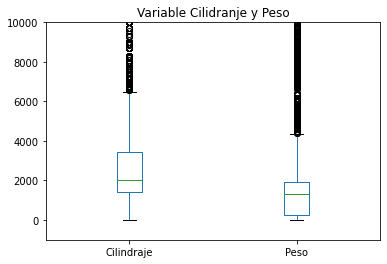

In [54]:

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
data1[['Cilindraje','Peso']].plot(kind = 'box',ylim=(-1000,10000))
plt.title('Variable Cilidranje y Peso')
plt.show()



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Unrecognized location 'top_right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # Remove the CWD from sys.path while we load stuff.


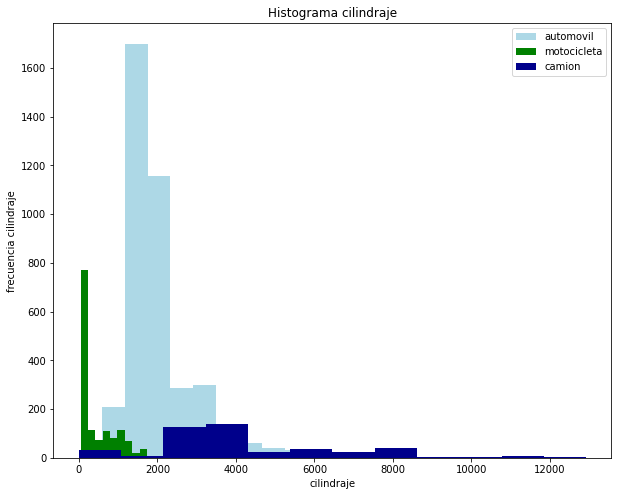

In [55]:
#Distribución del cilindraje de acuerdo a la clase automovil, camión y motocicleta
plt.figure(figsize=(10, 8))
n, bins, patches = plt.hist(automovil['Cilindraje'], 12, 
                            facecolor='lightblue', label='automovil')
n, bins, patches = plt.hist(motocicleta['Cilindraje'], 12, 
                            facecolor='green', label='motocicleta')
n, bins, patches = plt.hist(camion['Cilindraje'], 12, 
                            facecolor='darkblue', label='camion')

plt.legend(loc='top_right')
plt.title('Histograma cilindraje')
plt.xlabel('cilindraje')
plt.ylabel('frecuencia cilindraje')
plt.show()

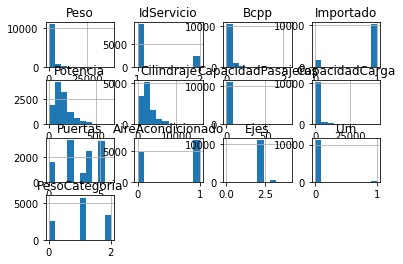

In [56]:
bd4.hist()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


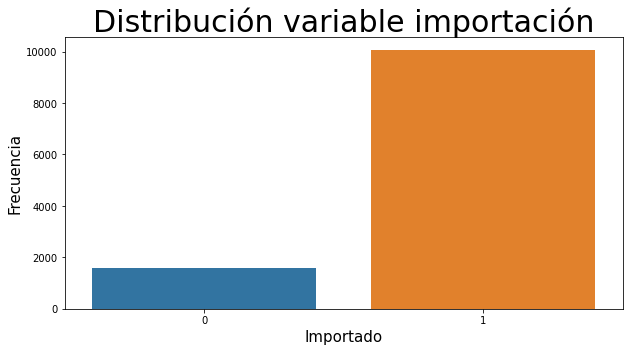

In [57]:
#Distribución variable importación
plt.rcParams['figure.figsize'] = (10, 5)
sns.countplot(data1['Importado'])
plt.title('Distribución variable importación', fontsize = 30)
plt.xlabel('Importado', fontsize = 15)
plt.ylabel('Frecuencia', fontsize = 15)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


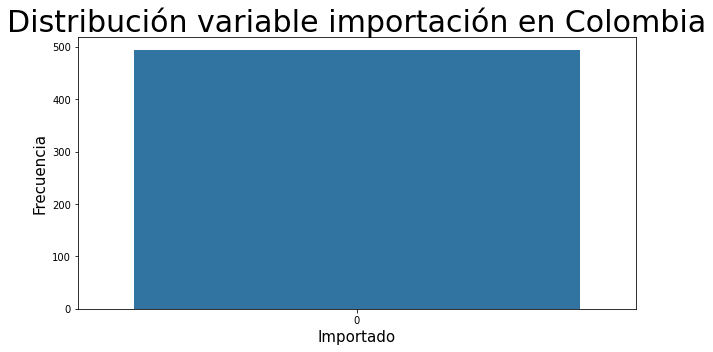

In [58]:
#Importacion en Colombia
plt.rcParams['figure.figsize'] = (10, 5)
sns.countplot(bd2['Importado'])
plt.title('Distribución variable importación en Colombia', fontsize = 30)
plt.xlabel('Importado', fontsize = 15)
plt.ylabel('Frecuencia', fontsize = 15)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


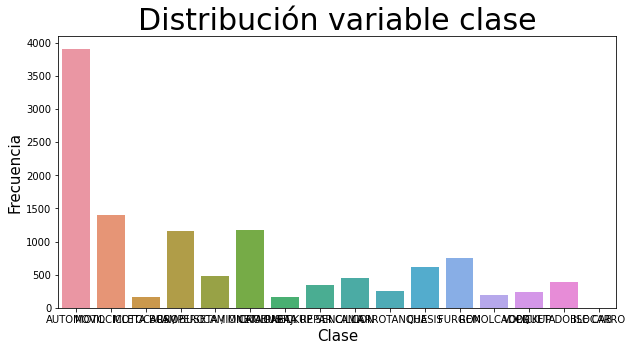

In [59]:
#Distribución variable clase
plt.rcParams['figure.figsize'] = (10, 5)
sns.countplot(data1['Clase'])
plt.title('Distribución variable clase', fontsize = 30)
plt.xlabel('Clase', fontsize = 15)
plt.ylabel('Frecuencia', fontsize = 15)
plt.show()

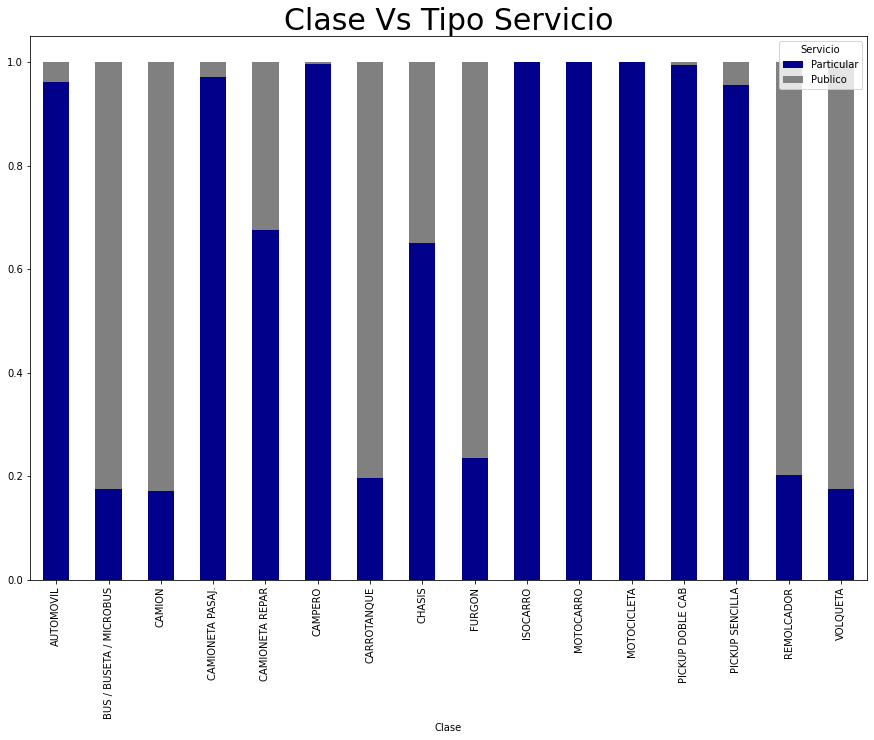

In [60]:
#Comportamiento variable clase y servicio
df = pd.crosstab(data1['Clase'], data1['Servicio'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 10), color = ['darkblue', 'grey'])
plt.title('Clase Vs Tipo Servicio', fontsize = 30)
plt.show()

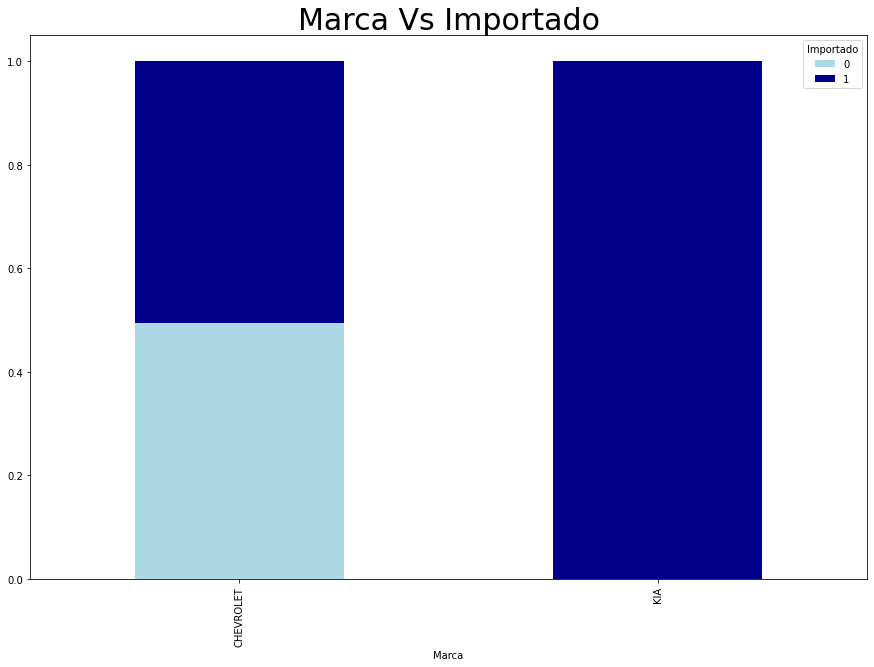

In [61]:
#Comportamiento variable marca e importación
df = pd.crosstab(bd1['Marca'], bd1['Importado'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 10), color = ['lightblue', 'darkblue'])
plt.title('Marca Vs Importado', fontsize = 30)
plt.show()

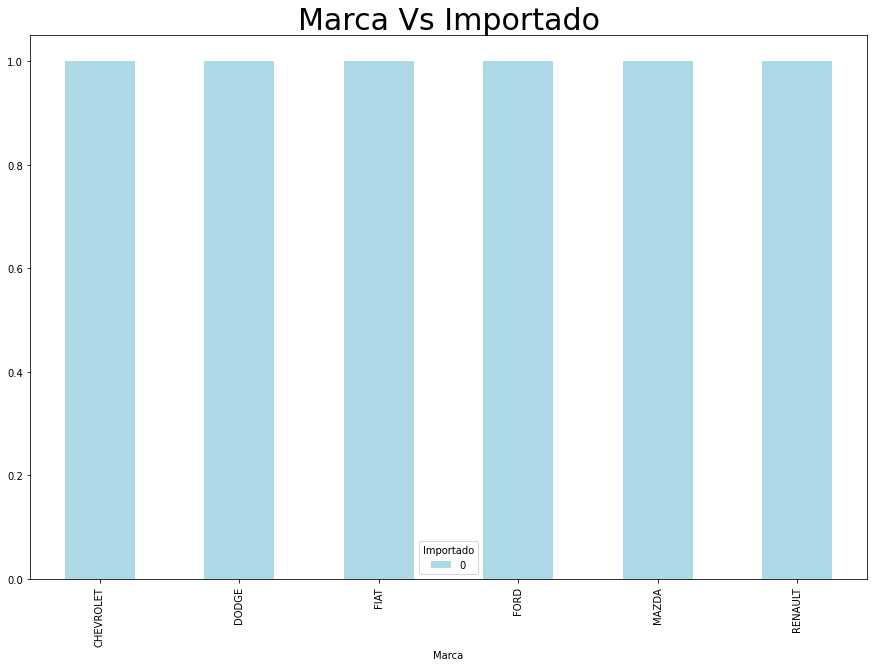

In [62]:
#Comportamiento variable marca e importación
df = pd.crosstab(bd2['Marca'], bd2['Importado'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 10), color = ['lightblue', 'darkblue'])
plt.title('Marca Vs Importado', fontsize = 30)
plt.show()

Validar correlación de variables

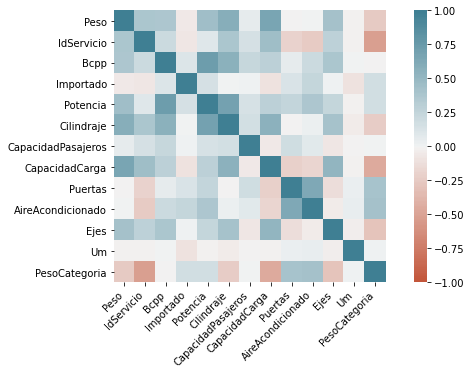

In [63]:
corr=bd4.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Conclusiones

De acuerdo a este análisis previo de los datos sobre la base de datos de FASECOLDA, que preguntas harias de análisis de datos que puedan generar valor.

Con que otra base de datos trabajarias para obtener valor de estos datos.

Utilize por lo menos dos análisis del curso de estadistica y/o de visualización de datos  para este problema.

Plantea una pregunta aprendizaje supervisado y otra de supervisado que pensarias genere valor sobre este dataset


Al analizar el comportamiento y distribución de las variables se dennota lo siguiente:



Para los vehiculos tipo automovil predominan los particulares, por otro lado en 

*  Para los vehiculos tipo automovil predominan los particulares, por otro lado en los vehiculos tipo, bus, microbus y volqueta predominan los vehiculos publicos.
*   Existe una mayor porcentaje de vehiculos tipo automovil en Colombia.
*   Las variables "Potencia" y "Cilindarje" tiene una mayor relación, en cambio las variables peso y "AireAcondicionado" estan medianamente relacionadas por lo que posiblemnete no sea util introducir estas variables en un modelo donde se busque responder una pregunta basada en el peso de un vehiculo.


Para obtener valor de estos datos cruzaría estos datos con una base de datos que tenga el historico de precios de venta y reventa de los vehiculos, para definir que variables predicen mejor el valor de un vehiculo.

Pregunta aprendizaje supervisado: Clasificar las clases de vehiculos de acuerdo a las caracteristicas del set de datos.

Pregunta aprendizaje no supervisado: Personalizar las caracteristicas de los vehiculos a importar por paises de acuerdo a la frecuencia de importación de tal país.




